In [75]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [76]:
data = pd.read_csv("./patients.csv")
data.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [77]:
# Average value
data.min()

age                29
gender              0
pain                0
blood_pressure     94
cholesterol       126
blood_sugar         0
heart_rate         71
exercise            0
outcome             0
dtype: int64

In [78]:
# Average value
data.mean()

age                54.366337
gender              0.683168
pain                0.966997
blood_pressure    131.623762
cholesterol       246.264026
blood_sugar         0.148515
heart_rate        149.646865
exercise            0.326733
outcome             0.544554
dtype: float64

In [79]:
# Average value
data.max()

age                77
gender              1
pain                3
blood_pressure    200
cholesterol       564
blood_sugar         1
heart_rate        202
exercise            1
outcome             1
dtype: int64

In [80]:
# Calculating correlation between cnt and other variables
corrs = data.corr()['outcome'][["age","gender","pain","blood_pressure","cholesterol","blood_sugar","heart_rate","exercise",]]

print('Correlation between outcome and other variables')
print(corrs)

Correlation between outcome and other variables
age              -0.225439
gender           -0.280937
pain              0.433798
blood_pressure   -0.144931
cholesterol      -0.085239
blood_sugar      -0.028046
heart_rate        0.421741
exercise         -0.436757
Name: outcome, dtype: float64


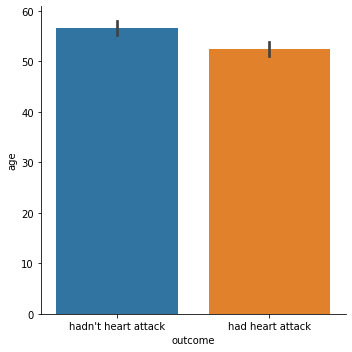

In [81]:
a = sns.catplot(
        data=data,
        y="age", x="outcome", 
        kind="bar")

a.set_xticklabels([ "hadn't heart attack","had heart attack"])
plt.show()

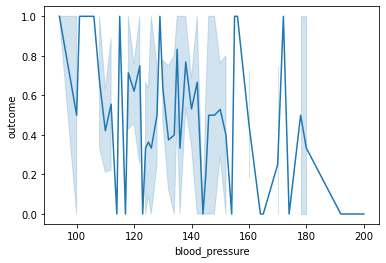

In [82]:
sns.lineplot(data=data, x="blood_pressure", y="outcome")
plt.show()

In [83]:
# list of columns which will be removed from training.
target_col = ['outcome']

X = data.drop( target_col , axis=1)
Y = data.outcome

# split the dataset into training(75%) and testing(25%).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0) 


In [84]:
# Create the model
model = LogisticRegression()

# build the model
model.fit(X_train, Y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
# predict the model with testing data 
Y_test_predction = model.predict(X_test)

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_test_predction))

Train data accuracy: 0.8061674008810573
Test data accuracy: 0.7763157894736842


In [86]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(random_state=0)


# Train Decision Tree Classifer
model = model.fit(X_train,Y_train)

#Predict the response for test dataset
# y_pred = clf.predict(X_test)

In [87]:
# predict the model with testing data 
Y_test_predction = model.predict(X_test)

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_test_predction))

Train data accuracy: 1.0
Test data accuracy: 0.6447368421052632


In [88]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

bagg = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
model = bagg.fit(X_train, Y_train)

In [ ]:
Y_test_predction = model.predict(X_test)

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_test_predction))

Train data accuracy: 0.801762114537445
Test data accuracy: 0.7894736842105263


In [ ]:
model =RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_test_predction = model.predict(X_test)

# Print the result of report
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred = Y_test_predction))

Train data accuracy: 1.0
Test data accuracy: 0.7236842105263158


In [ ]:
# https://github.com/imran-sarkar-0014/Assignments/blob/main/send-3/send%203/Assignment%203%20to%20do/assignment%203.2.ipynb